In [58]:
import pandas as pd
import numpy as np

In [203]:
all_data = pd.read_csv( 'all_annotations.csv', header= 0)
print(all_data.shape)
all_data.head()

(736267, 6)


,filename,class,ymin,xmin,ymax,xmax
0,10_00.mp4_00001.jpg,vehicle,286,1276,517,1559
1,10_00.mp4_00001.jpg,vehicle,311,1191,397,1286
2,10_00.mp4_00001.jpg,vehicle,306,1272,638,1708
3,10_00.mp4_00001.jpg,rider,285,1059,448,1127
4,10_00.mp4_00001.jpg,vehicle,9,1,665,866


In [204]:
all_unique_names = pd.unique(all_data['filename'])
print(all_unique_names.shape)

(89002,)


In [192]:
split_point = 60000
all_unique_dir = r'../IEEE/images/all/' + all_unique_names 
train_dir_img = all_unique_dir[:split_point]
val_dir_img = all_unique_dir[split_point:]


In [193]:
train_dir_img = pd.DataFrame(train_dir_img)
val_dir_img = pd.DataFrame(val_dir_img)
train_dir_img.to_csv('./rst/train_dir_img.txt', sep='\n',header = 0, index=False)
val_dir_img.to_csv('./rst/val_dir_img.txt', sep='\n',header = 0, index=False)
# np.savetxt('./rst/trai_dir_img.txt',train_dir_img , delimiter = '\n',fmt='%s')
# np.savetxt('./rst/val_dir_img.txt',val_dir_img , delimiter = '\n',fmt='%s')


In [179]:
# train_dir_label = train_dir_img.apply(lambda x: x.replace('.jpg', '.txt'))
# val_dir_label = val_dir_img.apply(lambda x: x.replace('.jpg', '.txt'))

In [205]:
all_data['class'] = all_data['class'].replace('rider','1')
all_data['class'] = all_data['class'].replace('vehicle','2')
all_data['class'] = all_data['class'].replace('pedestrian','0')
print(pd.unique(all_data['class']))
all_data.head()

['2' '1' '0']


,filename,class,ymin,xmin,ymax,xmax
0,10_00.mp4_00001.jpg,2,286,1276,517,1559
1,10_00.mp4_00001.jpg,2,311,1191,397,1286
2,10_00.mp4_00001.jpg,2,306,1272,638,1708
3,10_00.mp4_00001.jpg,1,285,1059,448,1127
4,10_00.mp4_00001.jpg,2,9,1,665,866


In [206]:
def xyxy2xywh(x):
    # Convert bounding box format from [x1, y1, x2, y2] to [x, y, w, h]
    x_is_pd = type(x) == pd.core.frame.DataFrame
    if(x_is_pd):
        x = x.values
    y = np.zeros_like(x)
    y[:, 0] = (x[:, 0] + x[:, 2]) / 2
    y[:, 1] = (x[:, 1] + x[:, 3]) / 2
    y[:, 2] = x[:, 2] - x[:, 0]
    y[:, 3] = x[:, 3] - x[:, 1]
    y = pd.DataFrame(y) if x_is_pd else y
    return y

In [207]:
#yxyx2xyxy
#xyxy2xywh
all_data_xyxy = pd.concat([
    all_data['xmin'],all_data['ymin'],all_data['xmax'],all_data['ymax']],1)
all_data_xywh = xyxy2xywh(all_data_xyxy)
all_data = pd.concat([
    all_data.iloc[:,:2],all_data_xywh],1)
all_data.columns = np.array(['filename', 'class','x','y','w','h'])
all_data.head()


,filename,class,x,y,w,h
0,10_00.mp4_00001.jpg,2,1417,401,283,231
1,10_00.mp4_00001.jpg,2,1238,354,95,86
2,10_00.mp4_00001.jpg,2,1490,472,436,332
3,10_00.mp4_00001.jpg,1,1093,366,68,163
4,10_00.mp4_00001.jpg,2,433,337,865,656


In [208]:
#Normalize xywh data
all_data['x'] = all_data['x'].apply(lambda x : "%06f" % (x/1920))
all_data['w'] = all_data['w'].apply(lambda x : "%06f" % (x/1920))
all_data['y'] = all_data['y'].apply(lambda x : "%06f" % (x/1080))
all_data['h'] = all_data['h'].apply(lambda x : "%06f" % (x/1080))
all_data.head()

,filename,class,x,y,w,h
0,10_00.mp4_00001.jpg,2,0.738021,0.371296,0.147396,0.213889
1,10_00.mp4_00001.jpg,2,0.644792,0.327778,0.049479,0.079630
2,10_00.mp4_00001.jpg,2,0.776042,0.437037,0.227083,0.307407
3,10_00.mp4_00001.jpg,1,0.569271,0.338889,0.035417,0.150926
4,10_00.mp4_00001.jpg,2,0.225521,0.312037,0.450521,0.607407


In [186]:
#output annotation
for u_name in all_unique_names:
    out = all_data[all_data['filename'] == u_name].iloc[:,1:]
    out.to_csv(r'./rst/labels/'+u_name[:-3]+'txt', sep=' ',header = 0, index=False)


In [185]:
#see one group of them
all_data[all_data['filename'] == '10_00.mp4_00001.jpg']

,filename,class,x,y,w,h
0,10_00.mp4_00001.jpg,2,0.738021,0.371296,0.147396,0.213889
1,10_00.mp4_00001.jpg,2,0.644792,0.327778,0.049479,0.079630
2,10_00.mp4_00001.jpg,2,0.776042,0.437037,0.227083,0.307407
3,10_00.mp4_00001.jpg,1,0.569271,0.338889,0.035417,0.150926
4,10_00.mp4_00001.jpg,2,0.225521,0.312037,0.450521,0.607407
5,10_00.mp4_00001.jpg,2,0.445312,0.317593,0.076042,0.099074
6,10_00.mp4_00001.jpg,2,0.509375,0.307407,0.050000,0.069444


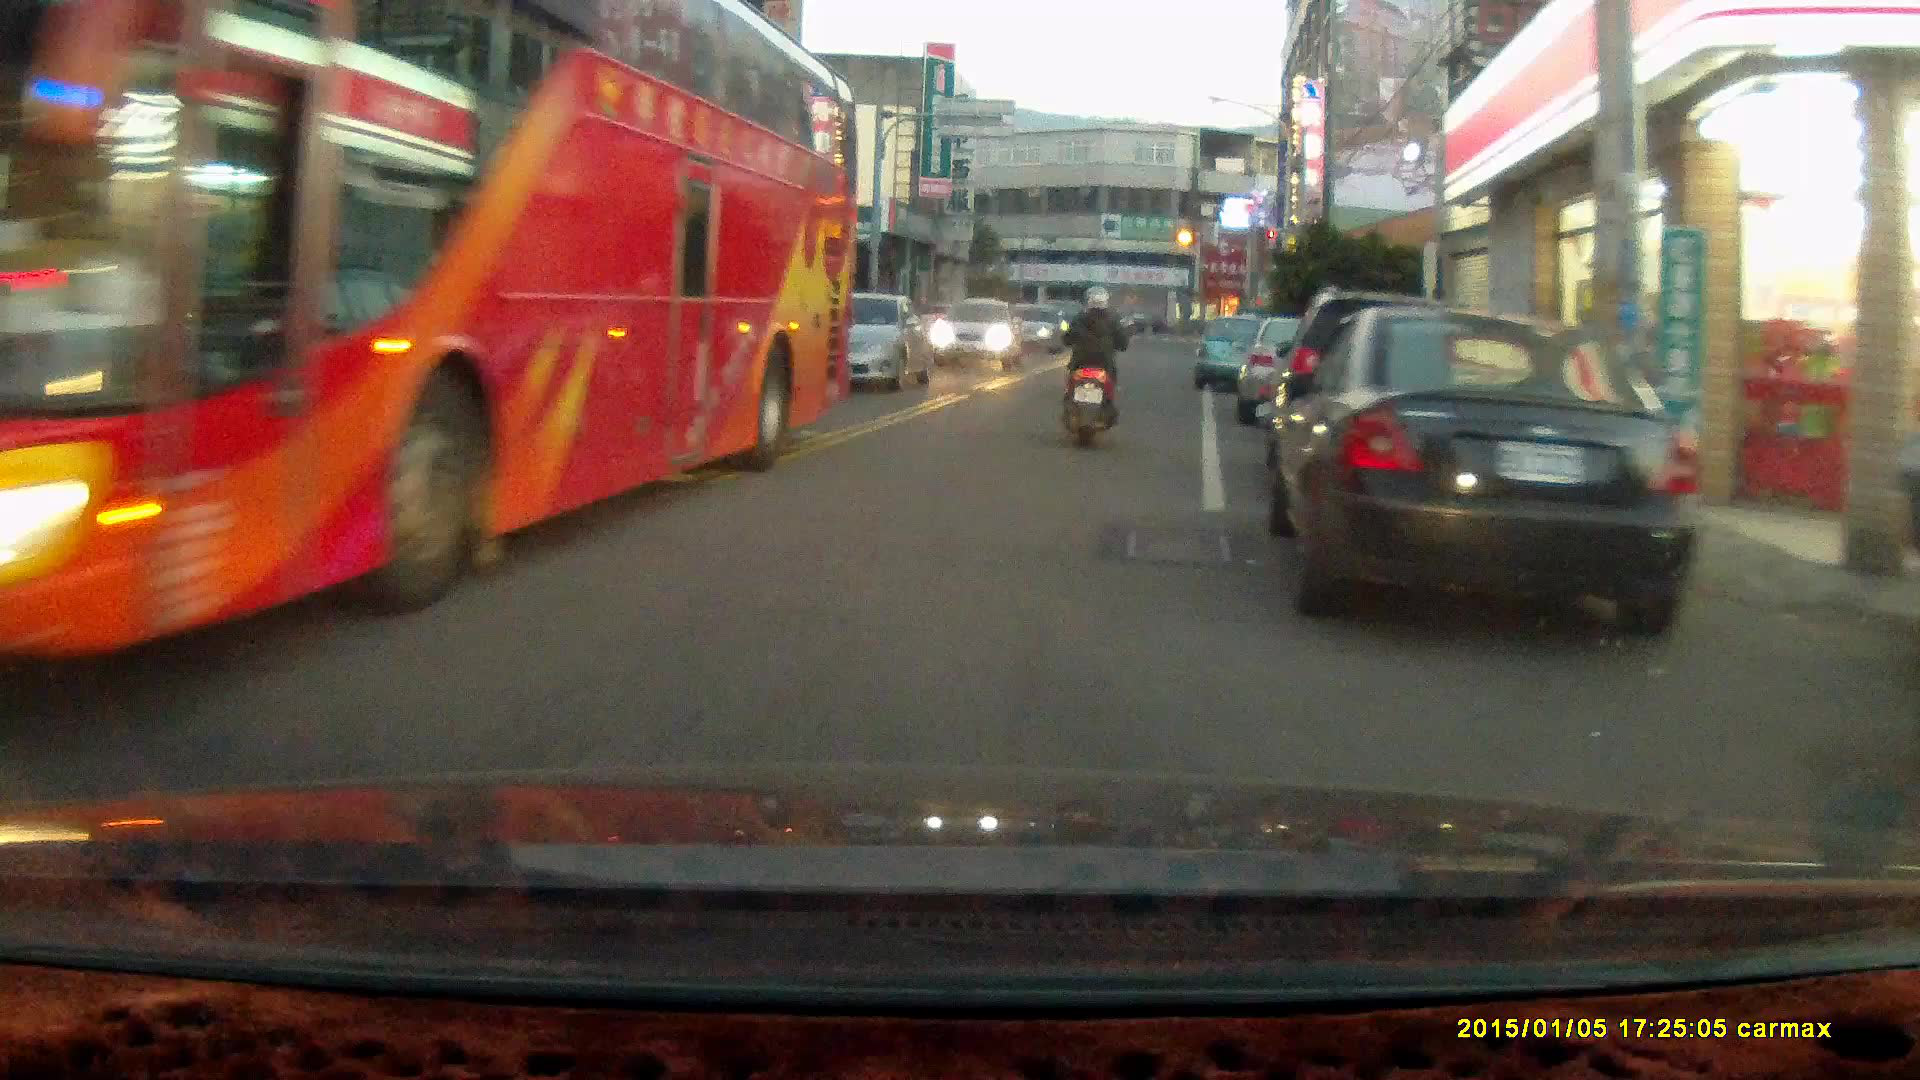

In [130]:
from PIL import Image #1920 x 1080 
Image.open('10_00.mp4_00001.jpg')

In [229]:
all_wh = pd.concat([all_data['w'],all_data['h']],1).values.astype(np.float32)
all_wh.shape

(736267, 2)

In [ ]:
#https://github.com/dleam/YOLO-v3-kmeans/blob/master/kmeans.py
import numpy as np
class YOLO_Kmeans:

    def __init__(self, cluster_number, filename):
        self.cluster_number = cluster_number
        self.filename = "2012_train.txt"

    def iou(self, boxes, clusters):  # 1 box -> k clusters
        n = boxes.shape[0]
        k = cluster_number

        box_area = boxes[:, 0] * boxes[:, 1]
        box_area = box_area.repeat(k)
        box_area = np.reshape(box_area, (n, k))

        cluster_area = clusters[:, 0] * clusters[:, 1]
        cluster_area = np.tile(cluster_area, [1, n])
        cluster_area = np.reshape(cluster_area, (n, k))

        box_w_matrix = np.reshape(boxes[:, 0].repeat(k), (n, k))
        cluster_w_matrix = np.reshape(np.tile(clusters[:, 0], (1, n)), (n, k))
        min_w_matrix = np.minimum(cluster_w_matrix, box_w_matrix)

        box_h_matrix = np.reshape(boxes[:, 1].repeat(k), (n, k))
        cluster_h_matrix = np.reshape(np.tile(clusters[:, 1], (1, n)), (n, k))
        min_h_matrix = np.minimum(cluster_h_matrix, box_h_matrix)
        inter_area = np.multiply(min_w_matrix, min_h_matrix)

        result = inter_area / (box_area + cluster_area - inter_area)
        return result

    def avg_iou(self, boxes, clusters):
        accuracy = np.mean([np.max(self.iou(boxes, clusters), axis=1)])
        return accuracy

    def kmeans(self, boxes, k, dist=np.median):
        box_number = boxes.shape[0]
        distances = np.empty((box_number, k))
        last_nearest = np.zeros((box_number,))
        np.random.seed()
        clusters = boxes[np.random.choice(
            box_number, k, replace=False)]  # init k clusters
        while True:

            distances = 1 - self.iou(boxes, clusters)

            current_nearest = np.argmin(distances, axis=1)
            if (last_nearest == current_nearest).all():
                break  # clusters won't change
            for cluster in range(k):
                clusters[cluster] = dist(  # update clusters
                    boxes[current_nearest == cluster], axis=0)

            last_nearest = current_nearest

        return clusters

    def result2txt(self, data):
        f = open("yolo_anchors.txt", 'w')
        row = np.shape(data)[0]
        for i in range(row):
            if i == 0:
                x_y = "%d,%d" % (data[i][0], data[i][1])
            else:
                x_y = ", %d,%d" % (data[i][0], data[i][1])
            f.write(x_y)
        f.close()

    def txt2boxes(self):
        f = open(self.filename, 'r')
        dataSet = []
        for line in f:
            infos = line.split(" ")
            length = len(infos)
            for i in range(1, length):
                width = int(infos[i].split(",")[2]) - \
                    int(infos[i].split(",")[0])
                height = int(infos[i].split(",")[3]) - \
                    int(infos[i].split(",")[1])
                dataSet.append([width, height])
        result = np.array(dataSet)
        f.close()
        return result

    def txt2clusters(self):
        all_boxes = self.txt2boxes()
        result = self.kmeans(all_boxes, k=self.cluster_number)
        result = result[np.lexsort(result.T[0, None])]
        self.result2txt(result)
        print("K anchors:\n {}".format(result))
        print("Accuracy: {:.2f}%".format(
            self.avg_iou(all_boxes, result) * 100))


if __name__ == "__main__":
    cluster_number = 9
    filename = "2012_train.txt"
    # Row format: image_file_path box1 box2 ... boxN;
    # Box format: x_min,y_min,x_max,y_max,class_id (no space).
    kmeans = YOLO_Kmeans(cluster_number, filename)
    kmeans.txt2clusters()

In [ ]:
#https://github.com/lars76/kmeans-anchor-boxes

In [223]:
import numpy as np

def iou(box, clusters):
    """
    Calculates the Intersection over Union (IoU) between a box and k clusters.
    :param box: tuple or array, shifted to the origin (i. e. width and height)
    :param clusters: numpy array of shape (k, 2) where k is the number of clusters
    :return: numpy array of shape (k, 0) where k is the number of clusters
    """
    x = np.minimum(clusters[:, 0], box[0])
    y = np.minimum(clusters[:, 1], box[1])
    if np.count_nonzero(x == 0) > 0 or np.count_nonzero(y == 0) > 0:
        raise ValueError("Box has no area")

    intersection = x * y
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]

    iou_ = intersection / (box_area + cluster_area - intersection)

    return iou_


def avg_iou(boxes, clusters):
    """
    Calculates the average Intersection over Union (IoU) between a numpy array of boxes and k clusters.
    :param boxes: numpy array of shape (r, 2), where r is the number of rows
    :param clusters: numpy array of shape (k, 2) where k is the number of clusters
    :return: average IoU as a single float
    """
    return np.mean([np.max(iou(boxes[i], clusters)) for i in range(boxes.shape[0])])


def translate_boxes(boxes):
    """
    Translates all the boxes to the origin.
    :param boxes: numpy array of shape (r, 4)
    :return: numpy array of shape (r, 2)
    """
    new_boxes = boxes.copy()
    for row in range(new_boxes.shape[0]):
        new_boxes[row][2] = np.abs(new_boxes[row][2] - new_boxes[row][0])
        new_boxes[row][3] = np.abs(new_boxes[row][3] - new_boxes[row][1])
    return np.delete(new_boxes, [0, 1], axis=1)


def kmeans(boxes, k, dist=np.median):
    """
    Calculates k-means clustering with the Intersection over Union (IoU) metric.
    :param boxes: numpy array of shape (r, 2), where r is the number of rows
    :param k: number of clusters
    :param dist: distance function
    :return: numpy array of shape (k, 2)
    """
    rows = boxes.shape[0]

    distances = np.empty((rows, k))
    last_clusters = np.zeros((rows,))

    np.random.seed()

    # the Forgy method will fail if the whole array contains the same rows
    clusters = boxes[np.random.choice(rows, k, replace=False)]

    while True:
        for row in range(rows):
            distances[row] = 1 - iou(boxes[row], clusters)

        nearest_clusters = np.argmin(distances, axis=1)

        if (last_clusters == nearest_clusters).all():
            break

        for cluster in range(k):
            clusters[cluster] = dist(boxes[nearest_clusters == cluster], axis=0)

        last_clusters = nearest_clusters

    return clusters


In [255]:
out = kmeans(all_wh, k=9)
print("Accuracy: {:.2f}%".format(avg_iou(all_wh, out) * 100))
print("Boxes:\n {}".format(out))

ratios = np.around(out[:, 0] / out[:, 1], decimals=2).tolist()
print("Ratios:\n {}".format(sorted(ratios)))


Accuracy: 71.07%
Boxes:
 [[0.077083 0.088889]
 [0.028125 0.040741]
 [0.163021 0.282407]
 [0.015104 0.057407]
 [0.115104 0.143519]
 [0.054688 0.211111]
 [0.272917 0.422222]
 [0.047396 0.061111]
 [0.027604 0.115741]]
Ratios:
 [0.23999999463558197, 0.25999999046325684, 0.25999999046325684, 0.5799999833106995, 0.6499999761581421, 0.6899999976158142, 0.7799999713897705, 0.800000011920929, 0.8700000047683716]
